# Feature Engineering and Polynomial Regression

Explore feature engineering and polynomial regression which allows to use the machinery of linear regression to fit very complicated, even very non-linear functions.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [2]:
def compute_cost(X, y, w, b):
    m = X.shape[0]  # number of samples
    x1 = X[:, 0]  # original feature
    x2 = X[:, 1]  # squared feature
    w1 = w[0]  # weight for original feature
    w2 = w[1]  # weight for squared feature

    cost = (1/(2*m)) * np.sum((w1*x1 + w2*x2 + b - y)**2)
    return cost

In [3]:
def gradient_descent(X, y, w, b, learning_rate, num_iterations):
    m = X.shape[0]  # number of samples
    x1 = X[:, 0]  # original feature
    x2 = X[:, 1]  # squared feature
    w1 = w[0]  # weight for original feature
    w2 = w[1]  # weight for squared feature

    for i in range(num_iterations):
        # compute gradients
        dw1 = (1/m) * np.sum((w1*x1 + w2*x2 + b - y) * x1)
        dw2 = (1/m) * np.sum((w1*x1 + w2*x2 + b - y) * x2)
        db = (1/m) * np.sum(w1*x1 + w2*x2 + b - y)
        
        # update parameters
        w1 -= learning_rate * dw1
        w2 -= learning_rate * dw2
        b -= learning_rate * db

    return np.array([w1, w2]), b

## Overview

Out of the box, linear regression provides a means of building models of the form:
$$f_{\mathbf{w},b} = w_0x_0 + w_1x_1+ ... + w_{n-1}x_{n-1} + b \tag{1}$$ 
What if your features/data are non-linear or are combinations of features? For example,  Housing prices do not tend to be linear with living area but penalize very small or very large houses resulting in a curve. How can we use the machinery of linear regression to fit this curve? Recall, the 'machinery' we have is the ability to modify the parameters $\mathbf{w}$, $\mathbf{b}$ in (1) to 'fit' the equation to the training data. However, no amount of adjusting of $\mathbf{w}$,$\mathbf{b}$ in (1) will achieve a fit to a non-linear curve.

In [16]:
# create target data
x = np.arange(0, 20, 1)
y = 1 + x**2

# Engineer features
# This creates a two-dimensional array where the first column is the original x and the second column is x squared
X = np.column_stack((x, x**2))  # both original and squared features are included

# initialize w as a two-dimensional vector because we now have two features
w = np.zeros((2,))  # initialize weight vector for 2 features
b = 0

# parameters
learning_rate = 0.001
num_iterations = 100000

# Normalize the features
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# run gradient descent
w, b = gradient_descent(X, y, w, b, learning_rate, num_iterations)
print(f"(w,b) found by gradient descent: ({w, b})")

(w,b) found by gradient descent: ((array([  1.77, 111.72]), 124.49999999999291))


In [17]:
def predict(X, w, b):
    """
    Predicts the target for the data X given the parameters w and b.
    """
    # Since w is a vector, this is equivalent to w1*x1 + w2*x2
    y_pred = np.dot(X, w) + b
    return y_pred

In [18]:
def plot_scatter_with_best_fit(X, Y, prediction_function, w, b, size=(8, 6)):
    """
    Plots the scatter plot of the data with the best fit line.
    """
    plt.figure(figsize=(size[0], size[1]))
    plt.scatter(X[:, 0], Y, label='Actual')  # plot only the first feature against Y

    Y_pred = prediction_function(X, w, b)
    mse = mean_squared_error(Y, Y_pred)

    # sort X and predictions for proper visualization
    sort_axis = np.argsort(X[:, 0])
    X_sorted = X[:, 0][sort_axis]
    Y_pred_sorted = Y_pred[sort_axis]

    plt.plot(X_sorted, Y_pred_sorted, color='red', label=f'Predicted (MSE = {mse:.2f})')
    plt.style.use('_mpl-gallery')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()
    return None

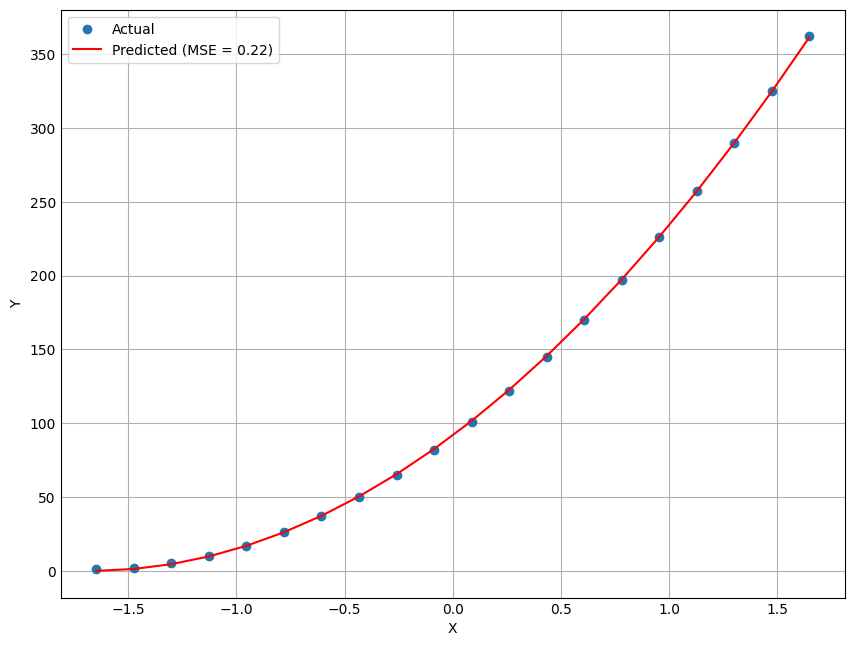

In [19]:
# run prediction
y_pred = predict(X, w, b)

# plot actual vs predicted
plot_scatter_with_best_fit(X, y, predict, w, b, size=(8, 6))